In [5]:
print('importing')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def df_to_input_output(df, with_ts=False):
    output_cols = ['load_to_pred']
    ts_cols = ['ts_pred']
    input_cols = [col for col in df.columns
                  if col not in output_cols + ts_cols]
    
    X = np.array(df[input_cols], dtype=float).reshape(-1, len(input_cols))  # (n_samples, n_features)
    y = np.array(df[output_cols], dtype=float).reshape(-1, len(output_cols))  # (n_samples, n_targets)
    ts = np.array(df[ts_cols]).reshape(-1, len(ts_cols))
    
    return (X, y, ts) if with_ts else (X, y)

print('loading')
df = pd.read_pickle('./data/data.pkl')
print('done')

importing
loading
done


In [23]:
df_ts_strs = df.ts_pred.map(str)

,ts_pred,load_to_pred,cat_is_sunday_or_holiday,cat_is_saturday_and_not_holiday,cat_is_workday,cat_is_heating_period,load_last_year,load_last_week,load_yesterday,load_last_hour,spline_peaking_at_21,spline_peaking_at_0,spline_peaking_at_3,spline_peaking_at_6,spline_peaking_at_9,spline_peaking_at_12,spline_peaking_at_15,spline_peaking_at_18
154940,2020-06-02 00:00:00+02:00,9709.25,False,False,True,False,10229.25,10957.25,9530.0,10542.0,0.166667,0.666667,0.166667,0.0,0.0,0.0,0.0,0.0


In [75]:
start_ts_str = '2020-06-02 00:00:00+02:00'
end_ts_str = '2020-06-09 00:00:00+02:00'
start_entry = df[df_ts_strs == start_ts_str]
end_entry = df[df_ts_strs == end_ts_str]
start_idx, end_idx = start_entry.index[0], end_entry.index[0]
data_section = df[start_entry.index[0]:end_entry.index[0]]
data_section

,ts_pred,load_to_pred,cat_is_sunday_or_holiday,cat_is_saturday_and_not_holiday,cat_is_workday,cat_is_heating_period,load_last_year,load_last_week,load_yesterday,load_last_hour,spline_peaking_at_21,spline_peaking_at_0,spline_peaking_at_3,spline_peaking_at_6,spline_peaking_at_9,spline_peaking_at_12,spline_peaking_at_15,spline_peaking_at_18
154940,2020-06-02 00:00:00+02:00,9709.25,False,False,True,False,10229.25,10957.25,9530.00,10542.00,0.166667,0.666667,0.166667,0.000000,0.0,0.0,0.0,0.000000
154941,2020-06-02 00:15:00+02:00,9583.75,False,False,True,False,10103.50,10834.00,9355.75,10264.25,0.128376,0.660012,0.211516,0.000096,0.0,0.0,0.0,0.000000
154942,2020-06-02 00:30:00+02:00,9528.75,False,False,True,False,10023.75,10729.25,9187.50,10067.50,0.096451,0.641204,0.261574,0.000772,0.0,0.0,0.0,0.000000
154943,2020-06-02 00:45:00+02:00,9339.75,False,False,True,False,9826.25,10740.50,9055.50,9920.00,0.070312,0.611979,0.315104,0.002604,0.0,0.0,0.0,0.000000
154944,2020-06-02 01:00:00+02:00,9294.75,False,False,True,False,9714.00,10611.50,8917.50,9709.25,0.049383,0.574074,0.370370,0.006173,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155607,2020-06-08 22:45:00+02:00,12253.50,False,False,True,False,10891.75,10805.00,11035.00,12865.00,0.425637,0.529225,0.033083,0.000000,0.0,0.0,0.0,0.012056
155608,2020-06-08 23:00:00+02:00,11971.50,False,False,True,False,10622.50,10542.00,10777.25,12872.75,0.370370,0.574074,0.049383,0.000000,0.0,0.0,0.0,0.006173
155609,2020-06-08 23:15:00+02:00,11730.50,False,False,True,False,10500.25,10264.25,10567.75,12700.00,0.315104,0.611979,0.070312,0.000000,0.0,0.0,0.0,0.002604
155610,2020-06-08 23:30:00+02:00,11537.00,False,False,True,False,10386.50,10067.50,10350.75,12480.25,0.261574,0.641204,0.096451,0.000000,0.0,0.0,0.0,0.000772


saving
showing


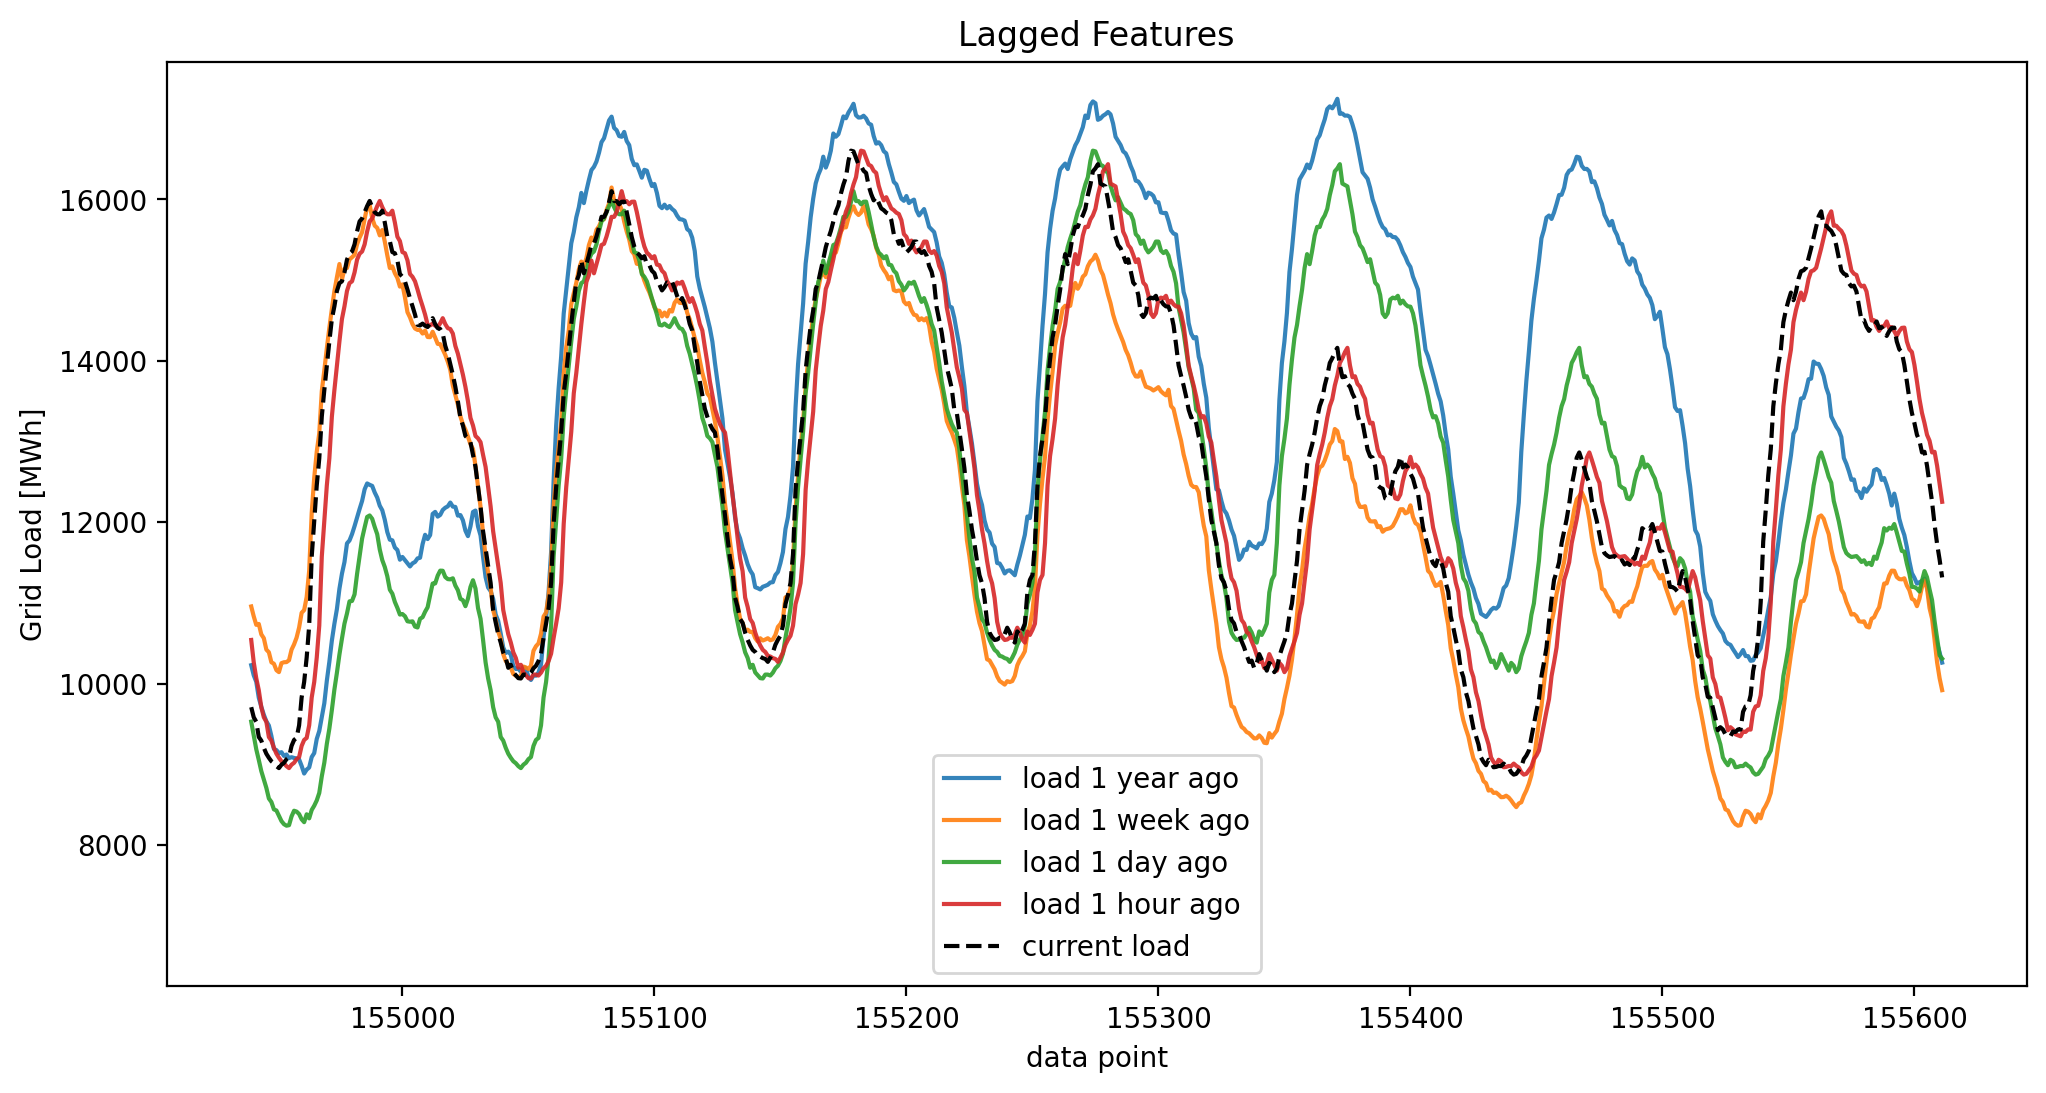

In [76]:
SAVE_FIG = True
DPI = 200 if SAVE_FIG else 100
SAVE_PATH = 'comparison_storage/plots/lagged_features_example.pdf'

xshift = 10
load_cols = {
    'load_last_year': 'load 1 year ago',
    'load_last_week': 'load 1 week ago',
    'load_yesterday': 'load 1 day ago',
    'load_last_hour': 'load 1 hour ago',
    'load_to_pred': 'current load',
}
# colors = {
#     'load_to_pred': 'black',
#     'load_last_hour': 'black',
#     'load_yesterday': 'black',
#     'load_last_week': 'black',
#     'load_last_year': 'black',
# }

fig, ax = plt.subplots(figsize=(12,6), dpi=DPI)

for col, label in load_cols.items():
    if col == 'load_to_pred':
        color='black'
        linestyle='--'
        alpha = 1
        zorder = 3
    else:
        color = None
        linestyle='-'
        alpha = 0.9
        zorder = 1
    ax.plot(data_section[col], label=label, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder)

ax.set_ylim(bottom=6250)
# ax.set_xlim(start_idx-xshift, end_idx+xshift)

ax.legend(loc='lower center')
ax.set_xlabel('data point')
ax.set_ylabel('Grid Load [MWh]')
plt.title('Lagged Features')

if SAVE_FIG:
    print('saving')
    plt.savefig(SAVE_PATH)
print('showing')